<a href="https://colab.research.google.com/github/dynasty-29/Autolib_Electric_Car_project/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_05_Margaret_Gathoni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Auto lib Electric cab Project By DynastyAnalytics**
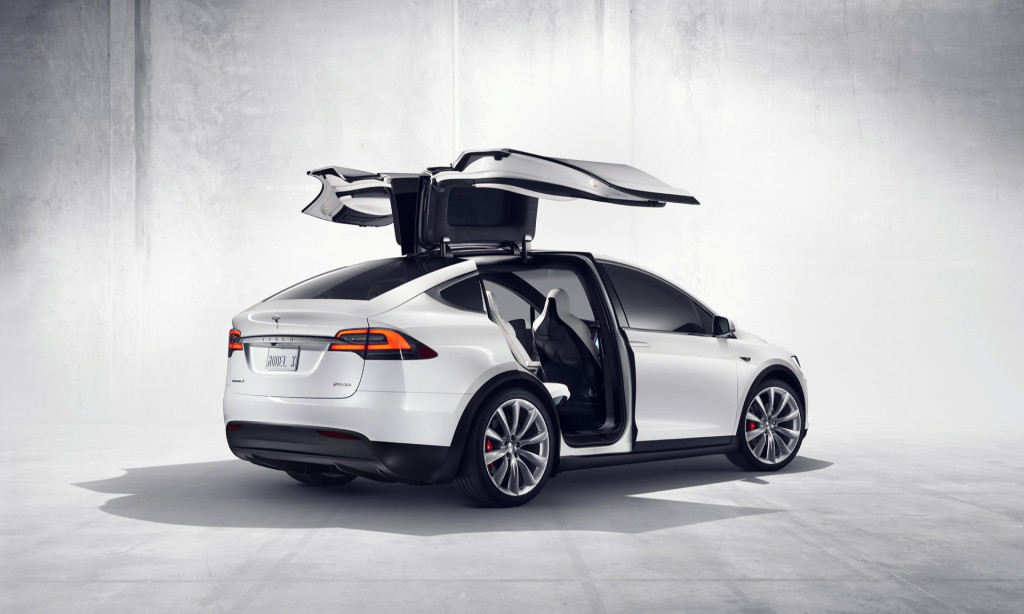






# **Introduction**

Auto lib electric cab company vision is to “create the most compelling car service company of the 21st century by driving the world’s transition to electric vehicles,” while its mission is to reimagine the way the world moves for the better. We specialize in offering corporate taxi and car hire services but also offer quality and personalized services for individuals as well.

## **Problem Statement**
The logistics manager have noticed a lot of clients request being denied leading to some drivers being overworked to cover these shifts and alot of complains from the employees on specific requests. He forwaded this concern to company Management team who rolled out a poll try and get a better understanding of the situation. Cab driver anonimously forwarded a claim that there were more  number of Bluecars taken compared to those returned which in return caused delay and overworking of those driver who had completed their shifts. Their concern was this was a high predisposing factor of nurn out which is a hazard overall to the personel, business and the clientlee

DynastyAnalytics which is their consulting firm has been tasked to investigate these claims and further analyse in repect to their peek days which is the weekdays. 

# **Research Questions**

As the consulting firms we went ahead and come up with some research questions to investigate using the data set provided


1.   Which are the peek days for the company

2.   Is there a correlation between the cars taken vs returned





## **Data Understanding**

*  will load libraries to use
*  load  our dataset and get a visual of what it entails






In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
##

In [2]:
#Load our dataset
cab_data = pd.read_csv('/content/autolib_daily_events_postal_code.csv')

In [3]:
#View first five rows
cab_data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
#View last five rows
cab_data.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [5]:
#Check our data info
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


We can see our data consist of Intergers and Strings as the data types

In [6]:
#Rows and Columns in our dataset respectively
cab_data.shape

(16085, 13)

## **Data Preparation and Cleaning**

Before trying to prove or disapprove our hypothesis with the aim of investigating the claims we will first clean our data sets


**1. Validity check**

In [7]:
#We view the columns in our datasets
cab_data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [8]:
#our interest is blue cars will therefor drop unnecessary column for our analysis
del cab_data['Utilib_taken_sum']

In [9]:
del cab_data['Utilib_returned_sum'] 

In [10]:
del cab_data['Utilib_14_returned_sum']
       

In [11]:
del cab_data['n_daily_data_points']

In [12]:
del cab_data['Utilib_14_taken_sum']

In [13]:
del cab_data['Slots_freed_sum']

In [14]:
del cab_data['Slots_taken_sum']

In [15]:
#We see if the columns are dropped
cab_data.head(3)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139


In [16]:
#We know a day of the week can either be a weekday or a weekend
#Here we check if we have that or any other variable
cab_data['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [17]:
#There are seven days in a week, we therefore check if our dataset has that
cab_data['dayOfWeek'].value_counts()

0    2374
1    2363
6    2274
4    2271
2    2268
3    2268
5    2267
Name: dayOfWeek, dtype: int64

**2. Accuracy check**

In [18]:
#Checking if we have correct data types
cab_data.dtypes

Postal code               int64
date                     object
dayOfWeek                 int64
day_type                 object
BlueCars_taken_sum        int64
BlueCars_returned_sum     int64
dtype: object

Its expected that day of week should be an object (as our dataset satisfies). 

We can also note our date data type is in string format %m/%d/%y

---



**3. Completeness check**

In [19]:
#We check for null values
cab_data.isnull().sum()

Postal code              0
date                     0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
dtype: int64

We have no null values meaning our data is complete

**4. Consistency check**

In [20]:
#We check if we have any duplicates
cab_data.duplicated().sum()

0

**5. Uniformity check**

Here will be standardizing and remaning columns names

In [21]:
#Quick overview of our columns
cab_data.head(1)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103


In [22]:
#Most of our columns are correctly named
#However will change the column naming of a few
cab_data=cab_data.rename(columns={'Postal code':'Area_code', 'dayOfWeek':'Day', 'data': 'Date', 'day_type':'DayType'})
cab_data.head()

,Area_code,date,Day,DayType,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


## **Exploratory Data Analysis**

Now that our data is clean we can do a few analysis

**1. Univarite Data Analysis**

In [23]:
cab_data.columns

Index(['Area_code', 'date', 'Day', 'DayType', 'BlueCars_taken_sum',
       'BlueCars_returned_sum'],
      dtype='object')

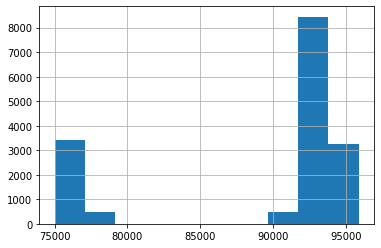

In [24]:
#Visual of Postal code distribution
cab_data['Area_code'].hist()

There was alot of activity among the 90000's postal code than 7 and 8 postal codes

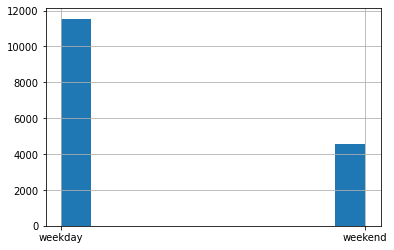

In [25]:
#Visual of the day type distribution
cab_data['DayType'].hist()

There were more activities with the blue cabs on the weekdays than the weekend. This is normal since there only two days on the weekedn and five on the weekday category

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


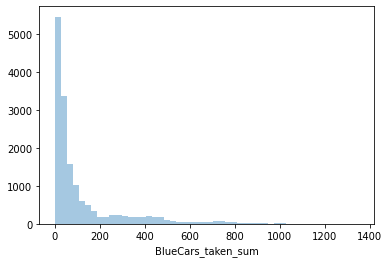

In [26]:
#A BlueCars_taken_sum distplot
sns.distplot(cab_data['BlueCars_taken_sum'],  kde=False,label='Cars Taken')

The maximum number of blue cars taken at a time was below 150

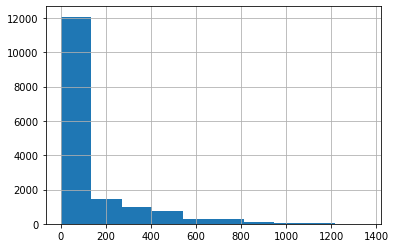

In [27]:
cab_data['BlueCars_taken_sum'].hist()

The maximum number of blue cars taken at a time was below 150

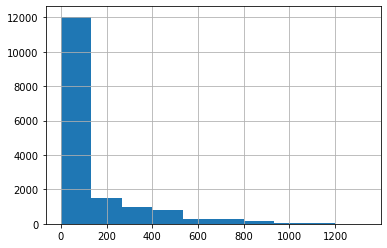

In [28]:
cab_data['BlueCars_returned_sum'].hist()

The maximum number of blue cars Returned at a time was below 150

In [29]:
#we do a summary statistics
cab_data.describe()

,Area_code,Day,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,125.926951,125.912714
std,7647.342000,2.008378,185.426579,185.501535
min,75001.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000,20.000000
50%,92340.000000,3.000000,46.000000,46.000000
75%,93400.000000,5.000000,135.000000,135.000000
max,95880.000000,6.000000,1352.000000,1332.000000


**2. Bivarite Data Analysis**

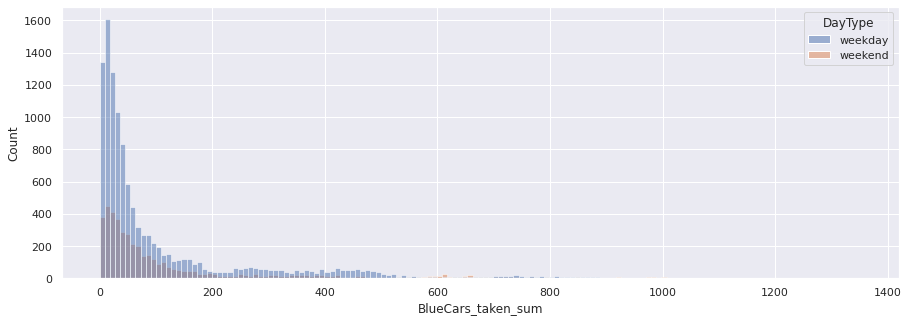

In [30]:
#we compare those with blue car taken depending on day of the week
sns.set(rc = {'figure.figsize':(15,5)})
sns.histplot( x="BlueCars_taken_sum", hue="DayType", data=cab_data)


There were more cars taken on the weekday compared to the weekend

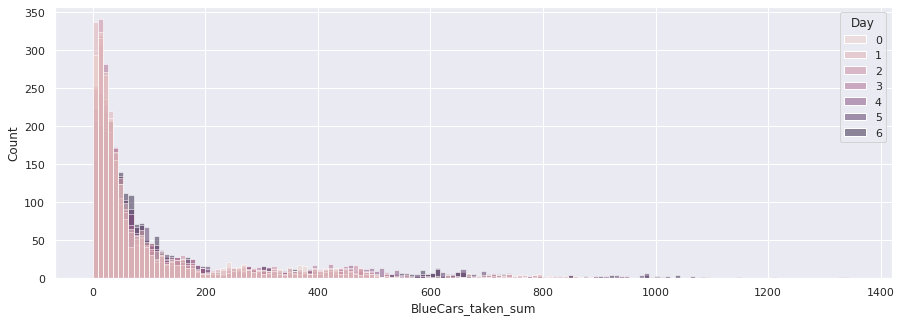

In [31]:
#we compare those with blue car taken depending on day of the week
sns.set(rc = {'figure.figsize':(15,5)})
sns.histplot( x="BlueCars_taken_sum", hue="Day", data=cab_data)


There were more cars taken on first days (0, 1, 2) compared to other days of the week

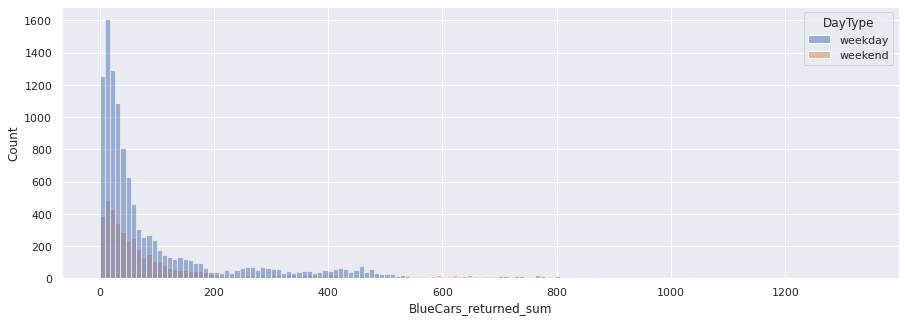

In [32]:
#we compare those with blue car returned depending on day of the week
sns.set(rc = {'figure.figsize':(15,5)})
sns.histplot( x="BlueCars_returned_sum", hue="DayType", data=cab_data)


There were more cars returned on the weekday compared to the weekend

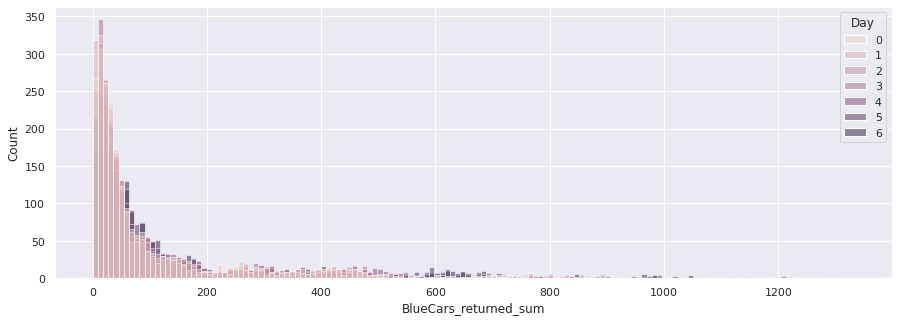

In [33]:
#we compare those with blue car taken depending on day of the week
sns.set(rc = {'figure.figsize':(15,5)})
sns.histplot( x="BlueCars_returned_sum", hue="Day", data=cab_data)



There were more cars Returned on first days (0, 1, 2) compared to other days of the week

<Figure size 1800x360 with 0 Axes>

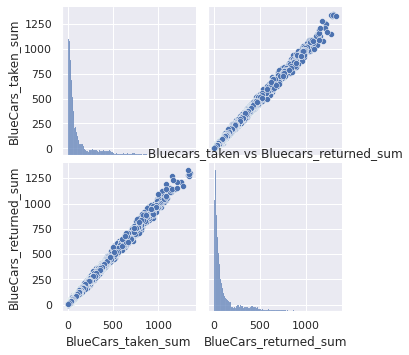

In [35]:
#comparing taken and returned cars
plt.figure(figsize=(25,5))
sns.pairplot(cab_data[['BlueCars_taken_sum','BlueCars_returned_sum']])
plt.title('Bluecars_taken vs Bluecars_returned_sum')
plt.show()

The trend of taken vs returned cars is equal

In [36]:
#correlation between the two
cab_data['BlueCars_taken_sum'].corr(cab_data['BlueCars_returned_sum'])

0.9986597051672199

There's a very strong correlation between the two 

**3. Multivariate Data Analysis**

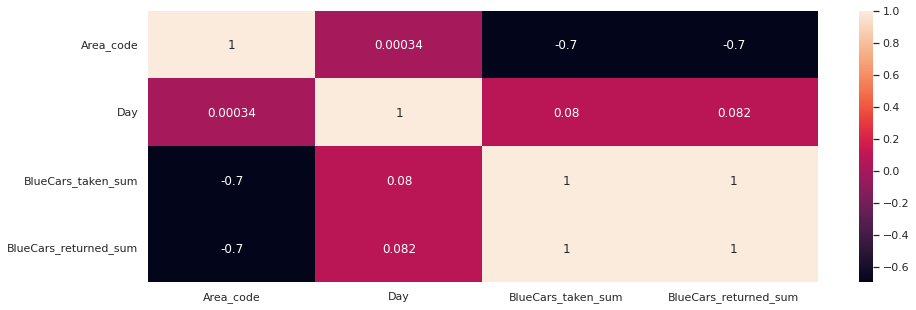

In [37]:
#we do a correlation of all the variables
sns.heatmap(cab_data.corr(),annot=True)
plt.show()

We can note
*   There is a strong correlation between car's taken vs returned to the day of the week





## **HYPOTHESIS TESTING**

In [64]:
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import norm
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import shapiro 
import scipy.stats as stats

**1. Hypothesis**

From our problem we can derive the hypotheis we want to test

**Null Hypothesis** - The average number of cabs taken equals number of cabs returned on a weekday

**Alternative Hypotheis** - The average number of cabs taken doesn't equal numner of cabs returned on a weekday

Our **p-Value** will be **0.05**

Also lets get the mean of the population before moving forward

In [60]:
cab_data[['BlueCars_taken_sum', 'BlueCars_returned_sum']].mean() 

BlueCars_taken_sum       116.028673
BlueCars_returned_sum    115.639380
dtype: float64

Also we calculate the standard deviation of taken vs returned cars

In [40]:
cab_data[['BlueCars_taken_sum', 'BlueCars_returned_sum']].std() 

BlueCars_taken_sum       185.426579
BlueCars_returned_sum    185.501535
dtype: float64

**2. Sampling**

Its important to note one key emphasis put is that the selected periods of interest be either weekdays or weekends but not a mix of both

In [42]:
#Before sampling we need to select our data in respect to the focus group which the weekday
#so we create a new table with only weekday data from our original data set
cab_data.drop(cab_data[cab_data['DayType']== 'weekend'].index, inplace = True)


In [43]:
#Just to confim our new data group
cab_data['DayType'].value_counts()

weekday    11544
Name: DayType, dtype: int64

We can see we have our focus group of weekday to move forward

We decided to continue with **simple random sampling** where it is a subset of a statistical population in which each member of the subset has an equal probability of being chosen. A simple random sample is meant to be an unbiased representation of a group in our case the weekday period.

**Determining our sample size**

To get to the preferred sample size there are things we need to consider:

**1. Population size **- our **population is 11544**. so we need a sample that doesn't under represent us.

**2. How confidence **we want our results to be in respect to our population - The **confidence interval expected is 95%**  for our sample size

**3. Margin of error** - since errors are inevitable we want to take into account how much difference we’ll allow between the mean number of our sample and the mean number of our population.** our margin of error 5%**


From this we arrived at a **sample of 372**

In [45]:
#we move forward to select a sample from our group
# Selecting the sample 
cab_sample = cab_data.sample(n = 372, replace="False")
cab_sample

,Area_code,date,Day,DayType,BlueCars_taken_sum,BlueCars_returned_sum
3260,75112,6/4/2018,0,weekday,8,9
2742,75018,4/4/2018,2,weekday,400,362
8886,92400,1/11/2018,3,weekday,100,102
8181,92350,3/26/2018,0,weekday,20,19
8335,92360,3/26/2018,0,weekday,8,10
...,...,...,...,...,...,...
15300,94500,6/15/2018,4,weekday,24,29
5726,92170,4/27/2018,4,weekday,54,47
15043,94450,2/20/2018,1,weekday,16,13
2897,75019,4/3/2018,1,weekday,431,414


Having all the necessary elements to test our hypothesis we then move to actually testing it

Before that lets get the mean and the standard deviation of our sample

In [46]:
#sample mean
cab_sample[['BlueCars_taken_sum', 'BlueCars_returned_sum']].mean() 

BlueCars_taken_sum       137.540323
BlueCars_returned_sum    136.760753
dtype: float64

In [52]:

#sample standard deviation
cab_sample[['BlueCars_taken_sum', 'BlueCars_returned_sum']].std() 

BlueCars_taken_sum       194.434299
BlueCars_returned_sum    192.830860
dtype: float64

**4. Testing our hypothesis**

Since our sample size is 372 we will use the z-score to test our hypothesis

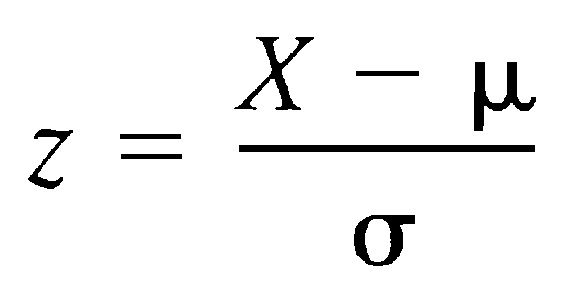

Testing 

In [62]:
#Taken cars
zscore = (137.54 - 125.93)/194.43
zscore



0.05971300725196721

In [ ]:
prob = stats.norm.cdf(zscore)
prob

In [54]:
#returned cars
zscore = (136.70 - 125.91)/192.83
zscore

prob = stats.norm.cdf(zscore)
prob

0.5223115797756462

We see our Z scores give us a probability of 0.52 which means we have no enough statistical evidence to reject the null hypothesis hence we Accept it

### **Confidence Intervals to test our hypothesis**

In [66]:
#we can also calculate our confidence interval which is 95%
# Finding the standard error of the taken cars mean of data 
# the calculate the confidence interval
sample_mean = cab_data['BlueCars_taken_sum'].mean()
sample_mean
std_error = cab_data['BlueCars_taken_sum'].std() / np.sqrt(372)
std_error

stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

(98.79128883304787, 133.26605697429792)

In [67]:
#Finding the standard error of the returned cars mean of data 
# the calculate the confidence interval
sample_mean = cab_data['BlueCars_returned_sum'].mean()
sample_mean
std_error = cab_data['BlueCars_returned_sum'].std() / np.sqrt(372)
std_error

stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

(98.53228735600315, 132.7464721727564)

Our population mean for BlueCars_taken_sum is 116.028673 and the confidence Interval of our is (98.79128883304787, 133.26605697429792) 

Our population mean for BlueCars_returned_sum is 115.639380 and the confidence Interval of our is (98.53228735600315, 132.7464721727564)

This observation tell us that indeed our sample is accurate to test our hypothesis and prove our null hypothesis to be true

## **Challenging our Results**

we will be challenging our results to see if the sample acquired is actually obtained from a normal. We don't except that our data is from a normaldistribution so our aim is to disapprove this hypothesis to show is our results are actually of good quality.

Shapiro-Wilk test is a test of normality, it determines whether the given sample comes from the normal distribution or not. Shapiro-Wilk’s test or Shapiro test is a normality test in frequentist statistics. The null hypothesis of Shapiro’s test is that the population is distributed normally.


*   Ho(Accepted): Sample is from the normal distributions.(Po>0.05)
*   Ha(Rejected): Sample is not from the normal distributions.




In [58]:
stat, p = shapiro(cab_sample['BlueCars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.691, p=0.000
Sample does not look Gaussian


In [59]:
stat, p = shapiro(cab_sample['BlueCars_returned_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.690, p=0.000
Sample does not look Gaussian


We therefore reject the null that our sample is normally distributed and accept the alternative

**5. Decision and Conclusion**

**a.** Weekdays are indeed the peek days for the company

**b.** There is indeed a strong correlation between cars taken and cars returned

**c.** We can confidently say from our analysis the average number of cars taken equals the average number of cars returned. This is because statistically there is no evidence to dispute this claim.

d. In deed our data is not a normal distribution since its has a positive skewness towards weekday. This expected since there are two days in the weekend and five on the weekday. Also the companies peeak days are the weekday. 


### **6. Recommedation**


*   Since the presented claim is actually affecting the daily activies which reflect on the overall output, Its important to look on other aspect like qualitative aspects such as motivation of employees.

*  Checking on miles and charging on different area codes which could be influencing the claim e.g. maybe some area codes are too far and have the same rate as the closer ones



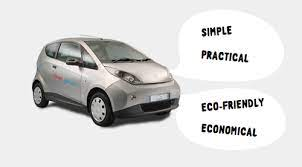